# Parameterizations

In [13]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pyqg
import json
import fsspec
import pickle
import os

#from pyqg_parameterization_benchmarks.neural_networks import FCNNParameterization
#from pyqg_parameterization_benchmarks.utils import energy_budget_figure
#from pyqg_parameterization_benchmarks.neural_networks import FullyCNN


%matplotlib inline
plt.rcParams.update({'font.size': 13})
%run nnClass.ipynb
%run utils.ipynb
%run forcing_data.ipynb

### ––– Fully Convolutional Neural Networks –––
##### Create new FCNN parameterization

In [2]:
# 1. generate data to train on
#eddy_forcing_data = generate_forcing_data()
#for i in eddy_forcing_data:
#    i['q_forcing_total'] = i.dqdt_bar - i.dqbar_dt

INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 1000, Time: 3.60e+06, KE: 1.68e-07, CFL: 0.023
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 2000, Time: 7.20e+06, KE: 1.86e-07, CFL: 0.023
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 3000, Time: 1.08e+07, KE: 2.32e-07, CFL: 0.023
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 4000, Time: 1.44e+07, KE: 3.05e-07, CFL: 0.023
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 5000, Time: 1.80e+07, KE: 4.21e-07, CFL: 0.023
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 6000, Time: 2.16e+07, KE: 6.08e-07, CFL: 0.023
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 7000, Time: 2.52e+07, KE: 9.15e-07, CFL: 0.023
INFO:  Logger i

INFO:  Logger initialized
INFO: Step: 60000, Time: 2.16e+08, KE: 6.31e-04, CFL: 0.214
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 61000, Time: 2.20e+08, KE: 6.73e-04, CFL: 0.238
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 62000, Time: 2.23e+08, KE: 6.59e-04, CFL: 0.226
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 63000, Time: 2.27e+08, KE: 6.41e-04, CFL: 0.268
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 64000, Time: 2.30e+08, KE: 6.46e-04, CFL: 0.230
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 65000, Time: 2.34e+08, KE: 6.72e-04, CFL: 0.229
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 66000, Time: 2.38e+08, KE: 6.64e-04, CFL: 0.214
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: St

In [100]:
fcnn_param = FCNNParameterization('./models/fcnn_test')
fcnn_q_qtot_param.train_on(dataset = eddy_forcing1, directory = './models/fcnn_test')

(87, 6, 64, 64)
[[[[-2.74570147e-03  2.02074274e-02  3.51291448e-02 ...  2.25199964e-02
     2.81613171e-02 -7.19249831e-04]
   [-2.25242809e-03  1.98801681e-02  3.39605473e-02 ...  2.38552205e-02
     2.82017644e-02 -7.65861536e-04]
   [-2.94292439e-03  1.88923460e-02  3.34266089e-02 ...  2.41117720e-02
     2.80409008e-02 -1.18402345e-03]
   ...
   [-3.25457938e-03  1.95952151e-02  3.36206742e-02 ...  2.28529796e-02
     2.84336805e-02 -1.05698674e-03]
   [-4.13064193e-03  1.92793719e-02  3.45525220e-02 ...  2.16756202e-02
     2.81941220e-02 -1.29311241e-03]
   [-3.61645059e-03  1.97374076e-02  3.54699194e-02 ...  2.16103159e-02
     2.84851957e-02 -6.34787604e-04]]

  [[ 3.51718044e-10  3.51718044e-10  3.51718044e-10 ...  3.51718044e-10
     3.51718044e-10  3.51718044e-10]
   [ 3.51718044e-10  3.51718044e-10  3.51718044e-10 ...  3.51718044e-10
     3.51718044e-10  3.51718044e-10]
   [ 3.51718044e-10  3.51718044e-10  3.51718044e-10 ...  3.51718044e-10
     3.51718044e-10  3.51718044

RuntimeError: mat1 and mat2 shapes cannot be multiplied (24576x64 and 4096x3)

In [101]:
fcnn_param = FCNNParameterization('./models/fcnn_test')

In [102]:
preds_q_qtot = fcnn_q_qtot_param.test_offline(eddy_forcing1) # this should return (near) 100 accuracy since it's trained on this dataset...

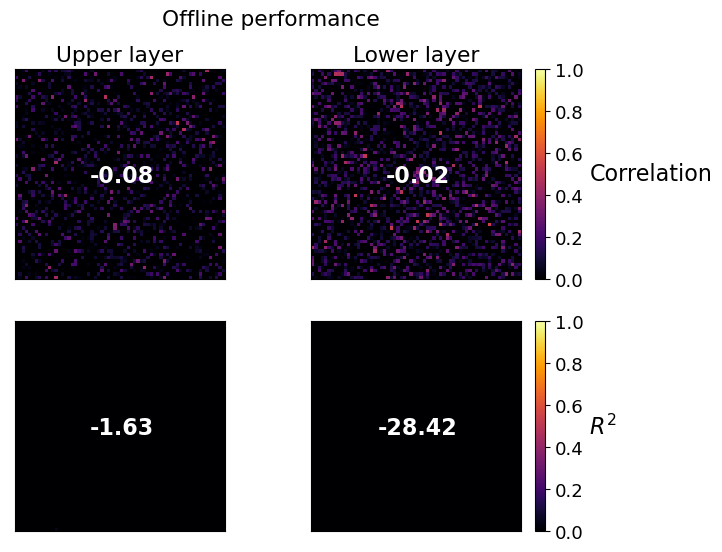

In [103]:
plt.figure(figsize=(7.6,6)).suptitle("Offline performance")

for z in [0,1]:
    plt.subplot(2,2,z+1,title=f"{['Upper','Lower'][z]} layer")
    imshow(preds_q_qtot.q_forcing_total_spatial_correlation.isel(lev=z))
    if z: colorbar("Correlation")
    
for z in [0,1]:
    plt.subplot(2,2,z+3)
    imshow(preds_q_qtot.q_forcing_total_spatial_skill.isel(lev=z))
    if z: colorbar("$R^2$")

In [32]:
# 2. initialize FCNN
in_q = ['q']
tar_q_tot = ['q_forcing_total']

fcnn_q_qtot = FullyCNN(inputs=in_q, targets=tar_q_tot)

In [33]:
fcnn_q_qtot_param = FCNNParameterization('./models/fcnn_q_qtot')

In [35]:
fcnn_q_qtot_param.train_on(dataset = eddy_forcing_data[0], directory = './models/fcnn_q_qtot', inputs=in_q, targets=tar_q_tot)

In [36]:
fcnn_q_qtot_param = FCNNParameterization('./models/fcnn_q_qtot')

In [37]:
preds_q_qtot = fcnn_q_qtot_param.test_offline(eddy_forcing_data[0]) # this should return (near) 100 accuracy since it's trained on this dataset...

In [38]:
# plot helpers 

def imshow(arr):
    plt.imshow(arr, vmin=0, vmax=1, cmap='inferno')
    mean = arr.mean().data
    plt.text(32, 32, f"{mean:.2f}", color=('white' if mean<0.75 else 'black'),
             fontweight='bold', ha='center', va='center', fontsize=16)
    plt.xticks([]); plt.yticks([])
    
def colorbar(label):
    plt.colorbar().set_label(label, fontsize=16,rotation=0,ha='left',va='center')

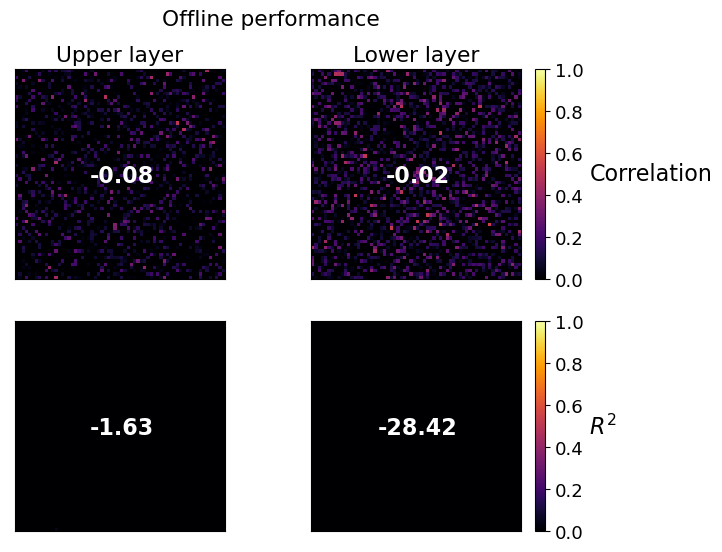

In [39]:
plt.figure(figsize=(7.6,6)).suptitle("Offline performance")

for z in [0,1]:
    plt.subplot(2,2,z+1,title=f"{['Upper','Lower'][z]} layer")
    imshow(preds_q_qtot.q_forcing_total_spatial_correlation.isel(lev=z))
    if z: colorbar("Correlation")
    
for z in [0,1]:
    plt.subplot(2,2,z+3)
    imshow(preds_q_qtot.q_forcing_total_spatial_skill.isel(lev=z))
    if z: colorbar("$R^2$")

###### Let's try another 

In [136]:
in_quv = ['q','u','v']
tar_qsub = ['q_subgrid_forcing']

fcnn_quv_qsub = FullyCNN(inputs=in_quv, targets=tar_qsub)

In [138]:
fcnn_quv_qsub_param = FCNNParameterization('./models/fcnn_quv_qsub')

In [139]:
fcnn_quv_qsub_param.train_on(dataset = eddy_forcing_data[0], directory = './models/fcnn_quv_qsub', inputs=in_quv, targets=tar_qsub)

NameError: name 'eddy_forcing_data' is not defined

In [41]:
fcnn_quv_qsub_param = FCNNParameterization('./models/fcnn_quv_qsub')

In [49]:
preds_quv_qsub = fcnn_quv_qsub_param.test_offline(eddy_forcing_data[0]) # this should return (near) 100 accuracy since it's trained on this dataset...

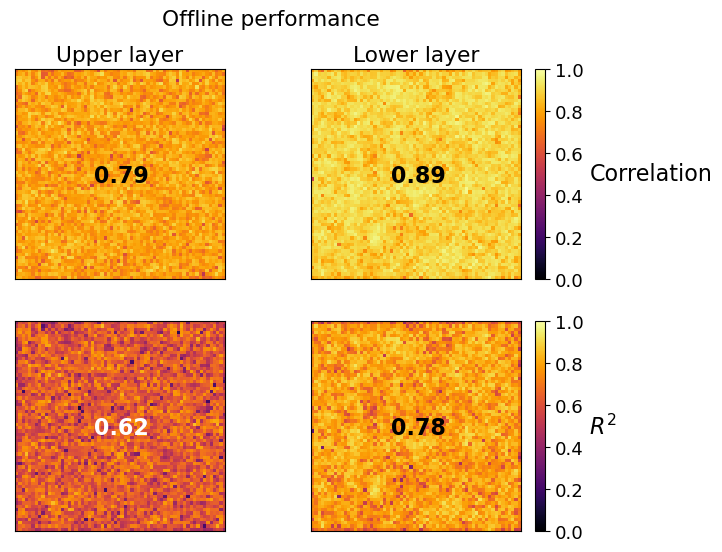

In [50]:
plt.figure(figsize=(7.6,6)).suptitle("Offline performance")

for z in [0,1]:
    plt.subplot(2,2,z+1,title=f"{['Upper','Lower'][z]} layer")
    imshow(preds_quv_qsub.q_subgrid_forcing_spatial_correlation.isel(lev=z))
    if z: colorbar("Correlation")
    
for z in [0,1]:
    plt.subplot(2,2,z+3)
    imshow(preds_quv_qsub.q_subgrid_forcing_spatial_skill.isel(lev=z))
    if z: colorbar("$R^2$")

##### Let's include WDL

In [2]:
%run WDL.ipynb

In [3]:
# to check against something we know, let's get the dataset given by benchmarking
def get_dataset(path, base='datasets'):
    mapper = fsspec.get_mapper(f"{base}/{path}.zarr")
    return xr.open_zarr(mapper, consolidated=True)

In [4]:
eddy_forcing1 = get_dataset('eddy/forcing1').isel(run=0).load()
eddy_forcing1['q_forcing_total'] = eddy_forcing1.dqdt_bar - eddy_forcing1.dqbar_dt

/Users/peterjin/opt/anaconda3/lib/python3.9/site-packages/xarray/backends/plugins.py:65: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [5]:
# this is already trained, we are just pulling this in to check out inputs, targets
with open('../pyqg_parameterization_benchmarks/models/fcnn_q_to_Sqtot1/models/0/inputs.pkl', 'rb') as f:
    inputs = pickle.load(f)
with open('../pyqg_parameterization_benchmarks/models/fcnn_q_to_Sqtot1/models/0/targets.pkl', 'rb') as f:
    targets = pickle.load(f)
    
model_dir = '../pyqg_parameterization_benchmarks/models/fcnn_q_to_Sqtot1/models/0'
param = FullyCNN.load(model_dir)
inputs = param.extract_inputs(eddy_forcing1)
targets = param.extract_targets(eddy_forcing1)

In [6]:
print(targets.shape)

(87, 1, 64, 64)


In [7]:
qhiresfcg = []
tarhiresfcg = []
for z in [0,1]: # 2 layers
    qhiresfcg.append(FeatureExtractor(eddy_forcing1.isel(lev=z))('q').ravel())
    tarhiresfcg.append(FeatureExtractor(eddy_forcing1.isel(lev=z))('q_forcing_total').ravel())
qhiresfcglayer1 = np.split(qhiresfcg[0],87)
qhiresfcglayer2 = np.split(qhiresfcg[1],87)
tarhiresfcglayer1 = np.split(tarhiresfcg[0],87)
tarhiresfcglayer2 = np.split(tarhiresfcg[1],87)

In [8]:
qhiresfcglayer1 = np.asarray(qhiresfcglayer1)
qhiresfcglayer2 = np.asarray(qhiresfcglayer2)
tarhiresfcglayer1 = np.asarray(tarhiresfcglayer1)
tarhiresfcglayer2 = np.asarray(tarhiresfcglayer2)

In [9]:
print(tarhiresfcglayer2.shape)

(87, 4096)


In [10]:
print(tarhiresfcglayer1[0].shape)

(4096,)


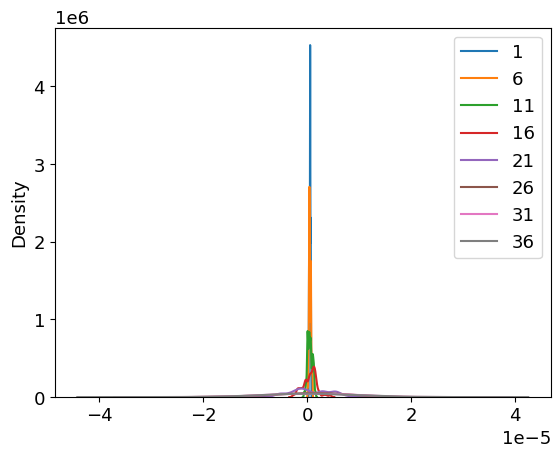

In [11]:
from scipy.stats import norm
import seaborn as sns

fig, ax = plt.subplots()

for t in range(1,40,5):
    sns.kdeplot(qhiresfcglayer1[t], ax=ax, label=str(t))
ax.legend()

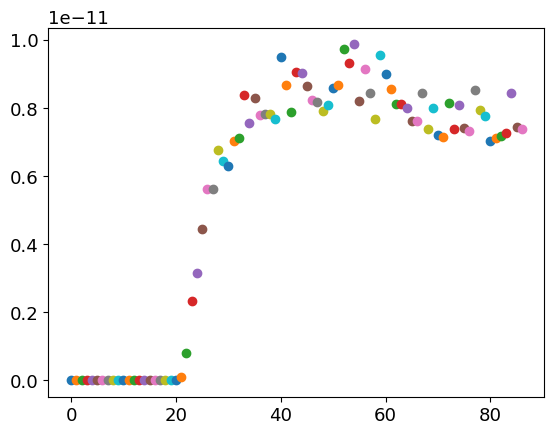

In [12]:
for t in range(0,87):
    plt.scatter(t, np.std(tarhiresfcglayer1[t]))

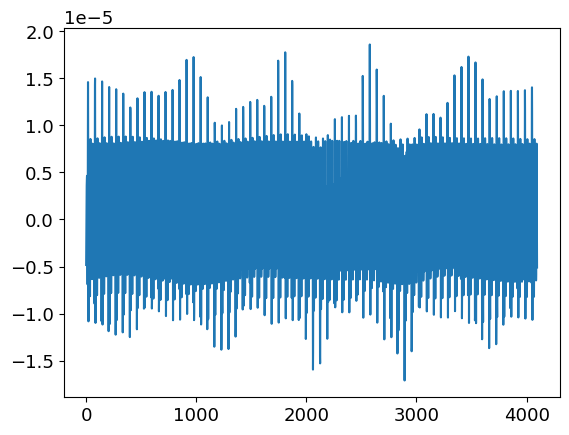

In [52]:
###########
# -- plot several yij --
# find how many modes:
# see density of marginal distribution
# X is 6464 low res grid, use MLP to find mu sig pi (all _k), k go from 1 to K (big K)
# MLP will have different window sizes 
# try with bigger window to see if we can see modes — flatten and go with larger mode
# run a few qqnorm tests 
# histogram ---> frequency

# for each timestep, plot variability and see if it converges or not


plt.plot([i for i,j in enumerate(qhiresfcglayer1[22])], qhiresfcglayer1[22])

In [48]:
# 2. initialize FCNN
in_q = ['q']
tar_q_tot = ['q_forcing_total']

fcnn_q_qtot = FullyCNN(inputs=in_q, targets=tar_q_tot)

In [12]:
fcnn_q_qtot_param = FCNNParameterization('./models/fcnn_q_qtot')

In [13]:
fcnn_q_qtot_param.train_on(dataset = eddy_forcing1, directory = './models/fcnn_q_qtot', inputs=in_q, targets=tar_q_tot)

In [14]:
fcnn_q_qtot_param = FCNNParameterization('./models/fcnn_q_qtot')

In [16]:
preds_q_qtot = fcnn_q_qtot_param.test_offline(eddy_forcing1) # this should return (near) 100 accuracy since it's trained on this dataset...

In [128]:
# xavier initialization to control variance across layers
def xavier_init(shape):
    limit = np.sqrt(6.0 / np.sum(shape))
    return np.random.uniform(-limit, limit, shape)

In [135]:
n = qhiresfcglayer1[0].shape[0] #4096
m = qhiresfcglayer1.shape[0] #87
k = 64

mu_init = torch.tensor(xavier_init((n, k)), requires_grad=True)
sd_init = torch.tensor(xavier_init((n, k)), requires_grad=True)
alpha_init = torch.tensor(xavier_init((n, k)), requires_grad=True)

In [ ]:
learning_rate = 0.01 #0.001 in nnclass
num_epochs = 50
optimizer = torch.optim.Adam([alpha_init, mu_init, sd_init], lr=learning_rate) 
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[int(num_epochs/2), int(num_epochs*3/4), int(num_epochs*7/8)], gamma=0.1)

n_levs = 100
q_vec = torch.arange(1, n_levs, dtype=torch.float64) / n_levs # quantile levels

K_mix = 64

Q_mat = np.array([np.quantile(Y[i], q_vec) for i in range(n_dist)]) # calculate the empirical quantile function

# input is q --> xtrain is q of net.forward(x.to(device)) (i.e. yhat)
#            --> ytrain is q of y.to(device) (i.e. ytrue)
# target is Sqtot
X_train = 
for k in range(1000):
    alpha = torch.matmul(X_train, alpha_init)
    mu = torch.matmul(X_train, mu_init)
    sd = torch.abs(torch.matmul(torch.abs(X_train), sd_init))

    pi = torch.softmax(alpha, dim=1)

    optimizer.zero_grad()
    loss = WDL(y_train, q_vec, mu, sd, pi)
    print(k, loss.item())
    loss.backward()
    optimizer.step()
    scheduler.step()

In [23]:
# do WDL for all distribution quantities
distribution_quantities = dict(
        q='q',
        u='ufull',
        v='vfull',
        KE='add(pow(ufull,2),pow(vfull,2))', # u^2 + v^2
        Ens='pow(curl(ufull,vfull),2)', # (u_y - v_x)^2
    )

spectral_quantities = [
    'KEspec',
    'Ensspec',
    'KEflux',
    'APEflux',
    'APEgenspec',
    'KEfrictionspec'
]

# see https://github.com/m2lines/pyqg_parameterization_benchmarks/blob/6395fb4b446a4c0228b4a4bd0fc4843ccc69daea/src/pyqg_parameterization_benchmarks/online_metrics.py#L46

---
### ––– DEBUGGING SECTION –––
Existing code pulled from benchmarking below for testing purposes

##### Load FCNN parameterization to check structure
- trained on $q \to S_{qtot}$ with operator 1

In [5]:
param = FCNNParameterization('../pyqg_parameterization_benchmarks/models/fcnn_q_to_Sqtot1')

# Print out a summary of its architecture -- note the circular padding,
# which was particularly important for performance.
param.models[0]

FullyCNN(
  (0): Conv2d(2, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), padding_mode=circular)
  (1): ReLU()
  (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Conv2d(128, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), padding_mode=circular)
  (4): ReLU()
  (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
  (7): ReLU()
  (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
  (10): ReLU()
  (11): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
  (13): ReLU()
  (14): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True

##### Load a forcing dataset 

In [6]:
def get_dataset(path, base='datasets'):
    mapper = fsspec.get_mapper(f"{base}/{path}.zarr")
    return xr.open_zarr(mapper, consolidated=True)

In [8]:
eddy_forcing1 = get_dataset('eddy/forcing1').isel(run=0).load()
eddy_forcing1['q_forcing_total'] = eddy_forcing1.dqdt_bar - eddy_forcing1.dqbar_dt

##### Check input/output files

In [9]:
with open('../pyqg_parameterization_benchmarks/models/fcnn_q_to_Sqtot1/models/0/inputs.pkl', 'rb') as f:
    inputs = pickle.load(f)
with open('../pyqg_parameterization_benchmarks/models/fcnn_q_to_Sqtot1/models/0/targets.pkl', 'rb') as f:
    targets = pickle.load(f)
    
print(inputs)
print(targets)

model_dir = '../pyqg_parameterization_benchmarks/models/fcnn_q_to_Sqtot1/models/0'
param = FullyCNN.load(model_dir)
inputs = param.extract_inputs(eddy_forcing1)
targets = param.extract_targets(eddy_forcing1)

print(inputs.shape)
print(targets.shape)

[('q', 0), ('q', 1)]
[('q_forcing_total', 0)]
(87, 2, 64, 64)
(87, 1, 64, 64)


In [10]:
def mse(self, inputs, targets, **kw):
    y_true = targets.reshape(-1, np.prod(targets.shape[1:]))
    print(y_true.shape)
    y_pred = self.predict(inputs).reshape(-1, np.prod(targets.shape[1:]))
    print(y_pred.shape)
    return np.mean(np.sum((y_pred - y_true)**2, axis=1))

In [11]:
mse(param, eddy_forcing1, targets, **json.loads(eddy_forcing1.pyqg_params))

(87, 4096)
(87, 4096)


2.2028072e-20

##### Offline Testing

In [16]:
preds = param.test_offline(eddy_forcing1)

AttributeError: 'FullyCNN' object has no attribute 'test_offline'

In [ ]:
# plot helpers 

def imshow(arr):
    plt.imshow(arr, vmin=0, vmax=1, cmap='inferno')
    mean = arr.mean().data
    plt.text(32, 32, f"{mean:.2f}", color=('white' if mean<0.75 else 'black'),
             fontweight='bold', ha='center', va='center', fontsize=16)
    plt.xticks([]); plt.yticks([])
    
def colorbar(label):
    plt.colorbar().set_label(label, fontsize=16,rotation=0,ha='left',va='center')

In [ ]:
plt.figure(figsize=(7.6,6)).suptitle("Offline performance")

for z in [0,1]:
    plt.subplot(2,2,z+1,title=f"{['Upper','Lower'][z]} layer")
    imshow(preds.q_forcing_total_spatial_correlation.isel(lev=z))
    if z: colorbar("Correlation")
    
for z in [0,1]:
    plt.subplot(2,2,z+3)
    imshow(preds.q_forcing_total_spatial_skill.isel(lev=z))
    if z: colorbar("$R^2$")

##### Online testing

In [ ]:
%%time
hires = get_dataset('eddy/high_res').isel(run=0)
lores = get_dataset('eddy/low_res').isel(run=0)
param_run = param.run_online(**json.loads(eddy_forcing1.pyqg_params))

In [ ]:
eddy_sims = [(hires, 'High-res'),(lores, 'Low-res'),(param_run,'Low-res+FCNN')]
fig = energy_budget_figure(eddy_sims)
fig.suptitle("Energy budget comparison, fully convolutional neural network")
plt.tight_layout()
plt.show()

Raw data snapshots just to confirm everything looks ok:

In [ ]:
plt.figure(figsize=(13,4)).suptitle("Upper PV snapshots")
for i, (m, label) in enumerate(eddy_sims):
    plt.subplot(1,3,i+1, title=label)
    plt.imshow(m.q.isel(lev=0,time=-1), cmap='bwr', vmin=-3e-5, vmax=3e-5)
plt.colorbar(label="Upper PV [$s^{-1}$]")
plt.tight_layout()

The FCNN-parameterized model seems to have larger overall values for the upper PV. We can also confirm this by looking at marginal distributions:

In [ ]:
from scipy.stats import gaussian_kde
plt.title("Differences in distributions of quasi-steady $q_1$")
for i, (m, label) in enumerate(eddy_sims):
    data = m.q.isel(lev=0,time=slice(-20,None)).data.ravel()
    dist = gaussian_kde(data)
    x = np.linspace(*np.percentile(data, [1,99]), 1000)
    plt.plot(x, dist(x), label=label, lw=3, ls=('--' if 'FCNN' in label else '-'))
plt.legend()
plt.xlabel("Upper PV [$s^{-1}$]")
plt.ylabel("Probability density")
plt.tight_layout()

The FCNN's distribution is much, much closer. In the paper, we quantify this with Wasserstein distance over a much larger set of variables.

##### Testing generalization

Now, although our FCNN performs well in a context that matches its training data, neural networks often have trouble generalizing to new domains. Let's try it with a second "jet" configuration:

In [ ]:
# This dataset has the same distribution as the FCNN's training data, but is not something the FCNN has seen
# (we regenerated the dataset after pyqg changes which standardized/saved more diagnostics).
jet_forcing1 = get_dataset('jet/forcing1').isel(run=0).load()
jet_forcing1['q_forcing_total'] = jet_forcing1.dqdt_bar - jet_forcing1.dqbar_dt

In [ ]:
preds2 = param.test_offline(jet_forcing1)

In [ ]:
plt.figure(figsize=(7.6,6)).suptitle("Offline performance, jet config")

for z in [0,1]:
    plt.subplot(2,2,z+1,title=f"{['Upper','Lower'][z]} layer")
    imshow(preds2.q_forcing_total_spatial_correlation.isel(lev=z))
    if z: colorbar("Correlation")
    
for z in [0,1]:
    plt.subplot(2,2,z+3)
    imshow(preds2.q_forcing_total_spatial_skill.isel(lev=z))
    if z: colorbar("$R^2$")

Although the FCNN's correlation is still reasonably high, its $R^2$ drops significantly, going negative in the lower layer. Note that across different random restarts, FCNN behavior varies here (some models have negative $R^2$s in both layers, even going down to -5 or lower).

Let's see what happens online:

In [ ]:
hires2 = get_dataset('jet/high_res').isel(run=0)
lores2 = get_dataset('jet/low_res').isel(run=0)
param_run2 = param.run_online(**json.loads(jet_forcing1.pyqg_params))